## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

data = load_boston()

X, y = data['data'], data['target']

In [2]:
import random

def draw_price():
    plt.scatter(X[:, 5], y)
    
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

$Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

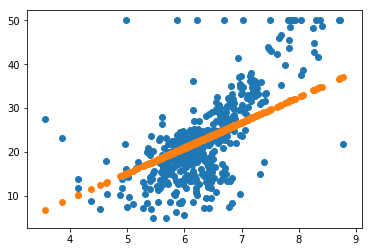

get best_k: 5.801182382433595 best_b: -13.8206302960931, and the loss is: 4.890373551501466


In [3]:
def loss(y, y_t): 
    losses = []
    for y_true, y_t in zip(list(y), list(y_t)):
        loss = abs(y_true - y_t)
        losses.append(loss)
    
    return sum(losses) / len(list(y))

X_rm = X[:, 5]
trying_times = 5000

min_loss = float('inf')   #正负无穷
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_t = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_t)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        
price_t = [price(r, best_k, best_b) for r in X_rm]
draw_price()
plt.scatter(X_rm, price_t)
plt.show()
print('get best_k: {} best_b: {}, and the loss is: {}'.format(best_k, best_b, min_loss))

In [4]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

update_time = 0

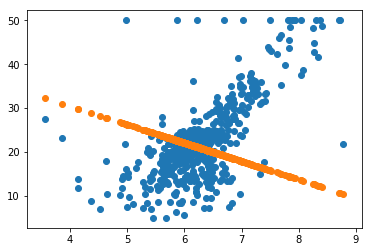

get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 8.154304532999324


In [5]:
for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_t = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_t)
    
    if current_loss < min_loss: 
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
#         if update_time % 10 == 0: 
#             print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)
        
price_t = [price(r, best_k, best_b) for r in X_rm]
draw_price()
plt.scatter(X_rm, price_t)
plt.show()
print('get best_k: {} best_b: {}, and the loss is: {}'.format(best_k, best_b, min_loss))

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [6]:
from icecream import ic

def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient


X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 680.7861167875025
When time is : 50, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 451.06518918412746
When time is : 100, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 298.83347863598993
When time is : 150, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 197.95240870795743
When time is : 200, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 131.10043846982913
When time is : 250, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 86.79890989517551
When time is : 300, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 57.44113310469064
When time is : 350, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 37.98629838118535
When time is : 400, get best_k: -4.181947183812229 best_b: 47.16913915568505, and the loss is: 

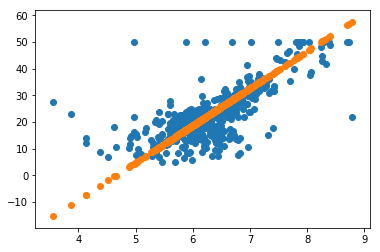

In [7]:
X_rm = X[:, 5]
k = 13.95667
b = -65.0650207
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_price()
plt.scatter(X_rm, price_by_random_k_and_b)

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](http://pic.newssc.org/upload/ori/20170602/1496373977373.jpg)

In [8]:
import requests
import re

def get_text(url, pattern):
    # 模拟请求头
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}
    # 读取到的网站信息
    response = requests.get(url, headers = headers).content.decode('utf-8')
    
    result = re.findall(pattern,response)
    
    return result

In [9]:
# 要获取信息的网站
url = "https://baike.baidu.com/item/%E6%88%90%E9%83%BD%E5%9C%B0%E9%93%81"

pattern = '<a target=_blank href="([\s\S]*?)">([\s\S]*?)</a>'

des_data = get_text(url, pattern)

head="https://baike.baidu.com"
s={}
for w,k in des_data:
    if "线" in k and k not in s:
        if 'data-lemmaid' not in w:
            s[k]=[head+w]

pattern1 = '<table log-set-param="table_view"[\s\S]*? data-sort="sortDisabled">(?:<caption>[\s\S]*?列表</caption>)?([\s\S]*?)</table>'
pattern2='<a target=_blank href="[\s\S]*?">([\s\S]*?)</a>'
            
subwaydict={}
for subway,url in s.items():
    text_1 = get_text(url[0],pattern1)[0]   
    des = re.findall(pattern2, text_1)
    subwaydict[subway] = des

    for sub in subwaydict:
        sta=[]
        for station in subwaydict[sub]:
            if "站" in station:
                sta.append(station)
        subwaydict[sub]=sta
    
subwaydict

{'成都地铁1号线': ['韦家碾站',
  '升仙湖站',
  '火车北站',
  '人民北路站',
  '文殊院站',
  '骡马市站',
  '天府广场站',
  '锦江宾馆站',
  '华西坝站',
  '省体育馆站',
  '倪家桥站',
  '桐梓林站',
  '火车南站',
  '高新站',
  '金融城站',
  '孵化园站',
  '锦城广场站',
  '世纪城站',
  '天府三街站',
  '天府五街站',
  '华府大道站',
  '四河站',
  '广都站',
  '五根松站',
  '华阳站',
  '海昌路站',
  '广福站',
  '红石公园站',
  '麓湖站',
  '武汉路站',
  '天府公园站',
  '西博城站',
  '广州路站',
  '兴隆湖站',
  '科学城站'],
 '成都地铁2号线': ['龙泉驿站',
  '龙平路站',
  '书房站',
  '界牌站',
  '连山坡站',
  '大面铺站',
  '成都行政学院站',
  '洪河站',
  '惠王陵站',
  '成渝立交站',
  '成都东客站',
  '塔子山公园站',
  '东大路站',
  '牛市口站',
  '牛王庙站',
  '东门大桥站',
  '春熙路站',
  '天府广场站',
  '人民公园站',
  '通惠门站',
  '中医大省医院站',
  '白果林站',
  '蜀汉路东站',
  '一品天下站',
  '羊犀立交站',
  '茶店子客运站',
  '迎宾大道站',
  '金科北路站',
  '金周路站',
  '百草路站',
  '天河路站',
  '犀浦站'],
 '成都地铁3号线': ['军区总医院站',
  '熊猫大道站',
  '动物园站',
  '昭觉寺南路站',
  '驷马桥站',
  '李家沱站',
  '前锋路站',
  '红星桥站',
  '市二医院站',
  '春熙路站',
  '新南门站',
  '磨子桥站',
  '省体育馆站',
  '衣冠庙站',
  '高升桥站',
  '红牌楼站',
  '太平园站'],
 '成都地铁4号线': ['万盛站',
  '杨柳河站',
  '凤溪河站',
  '南熏大道站',
  '光华公园站',
  '涌泉站',
  '凤凰大街站',
  '马厂坝站',
  '非遗

In [10]:
station = {}
for sub in subwaydict:
    for i, sta in enumerate(subwaydict[sub]):
        if sta not in station:
            station[sta] = []
        if i - 1 >= 0:
            station[sta].append(subwaydict[sub][i - 1])
        if i + 1 <= len(subwaydict[sub]) - 1:
            station[sta].append(subwaydict[sub][i + 1])
            
station

{'韦家碾站': ['升仙湖站'],
 '升仙湖站': ['韦家碾站', '火车北站'],
 '火车北站': ['升仙湖站', '人民北路站', '驷马桥站'],
 '人民北路站': ['火车北站', '文殊院站'],
 '文殊院站': ['人民北路站', '骡马市站'],
 '骡马市站': ['文殊院站', '天府广场站', '宽窄巷子站', '太升南路站'],
 '天府广场站': ['骡马市站', '锦江宾馆站', '春熙路站', '人民公园站'],
 '锦江宾馆站': ['天府广场站', '华西坝站'],
 '华西坝站': ['锦江宾馆站', '省体育馆站'],
 '省体育馆站': ['华西坝站', '倪家桥站', '磨子桥站', '衣冠庙站'],
 '倪家桥站': ['省体育馆站', '桐梓林站'],
 '桐梓林站': ['倪家桥站', '火车南站'],
 '火车南站': ['桐梓林站', '高新站', '三瓦窑站', '神仙树站'],
 '高新站': ['火车南站', '金融城站'],
 '金融城站': ['高新站', '孵化园站'],
 '孵化园站': ['金融城站', '锦城广场站'],
 '锦城广场站': ['孵化园站', '世纪城站'],
 '世纪城站': ['锦城广场站', '天府三街站'],
 '天府三街站': ['世纪城站', '天府五街站'],
 '天府五街站': ['天府三街站', '华府大道站'],
 '华府大道站': ['天府五街站', '四河站'],
 '四河站': ['华府大道站', '广都站'],
 '广都站': ['四河站', '五根松站'],
 '五根松站': ['广都站', '华阳站'],
 '华阳站': ['五根松站', '海昌路站'],
 '海昌路站': ['华阳站', '广福站'],
 '广福站': ['海昌路站', '红石公园站'],
 '红石公园站': ['广福站', '麓湖站'],
 '麓湖站': ['红石公园站', '武汉路站'],
 '武汉路站': ['麓湖站', '天府公园站'],
 '天府公园站': ['武汉路站', '西博城站'],
 '西博城站': ['天府公园站', '广州路站'],
 '广州路站': ['西博城站', '兴隆湖站'],
 '兴隆湖站': ['广州路站', '科学城站'],
 '科

In [11]:
def shortest_path_first(pathes):
    if len(pathes) <= 1: return pathes
    return sorted(pathes,key=len)
def search(start, destination, connection_grpah, sort_candidate):
    if "站" not in start:
        start+="站"
    if "站" not in destination:
        destination+="站"
    if start not in connection_grpah:
        return start+"站点不存在"
    if destination not in connection_grpah:
        return destination+"站点不存在"
    pathes = [[start]]
    visitied = list()
    while pathes:  # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in visitied: continue
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue  # eliminate loop
            new_path = path+[city]
            pathes.append(new_path)
            if city == destination: return new_path
        visitied.append(froninter)
    pathes = sort_candidate(pathes)  # 我们可以加一个排序函数 对我们的搜索策略进行控制
    return pathes


def pretty_print(cities):
    print('🚇->'.join(cities))
    
pretty_print(search('高升桥站', '天府五街站', station, sort_candidate=shortest_path_first))

高升桥站🚇->衣冠庙站🚇->省体育馆站🚇->倪家桥站🚇->桐梓林站🚇->火车南站🚇->高新站🚇->金融城站🚇->孵化园站🚇->锦城广场站🚇->世纪城站🚇->天府三街站🚇->天府五街站
